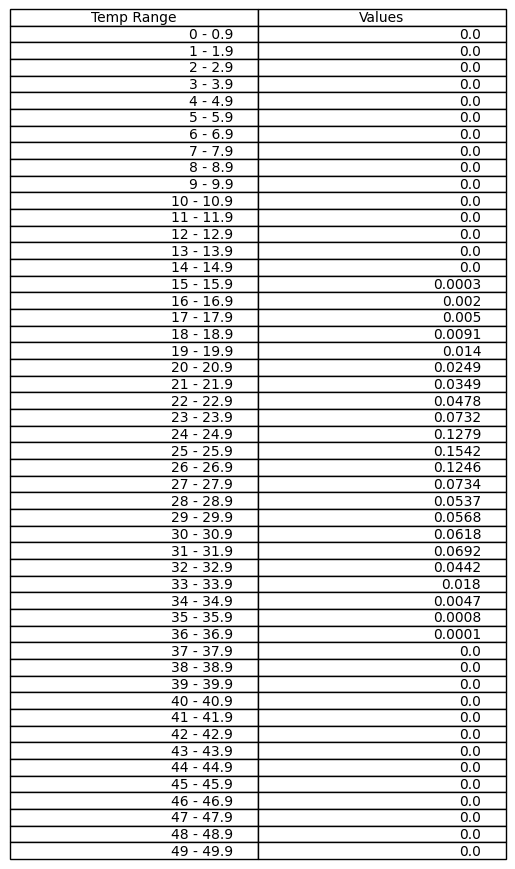

In [1]:
# # This Python 3 environment comes with many helpful analytics libraries installed
# # It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# # For example, here's several helpful packages to load

# # Get the temperature bin values for a month

# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# import matplotlib.pyplot as plt
# import numpy as np
# import math


# year = 0
# month_data = [
#   {
#     "month": "January",
#     "file_path": "/kaggle/input/ikeja-datasets/ikeja_datasets.csv"
#   },
# #   {
# #     "month": "February",
# #     "file_path": "/kaggle/input/ikeja-datasets/ikeja_datasets.csv"
# #   },
# #   {
# #     "month": "March",
# #     "file_path": "/kaggle/input/ikeja-datasets/ikeja_datasets.csv"
# #   },
# #   {
# #     "month": "April",
# #     "file_path": "/kaggle/input/ikeja-datasets/ikeja_datasets.csv"
# #   },
# #   {
# #     "month": "May",
# #     "file_path": "/kaggle/input/ikeja-datasets/ikeja_datasets.csv"
# #   },
# #   {
# #     "month": "June",
# #     "file_path": "/kaggle/input/ikeja-datasets/ikeja_datasets.csv"
# #   },
# #   {
# #     "month": "July",
# #     "file_path": "/kaggle/input/ikeja-datasets/ikeja_datasets.csv"
# #   },
# #   {
# #     "month": "August",
# #     "file_path": "/kaggle/input/ikeja-datasets/ikeja_datasets.csv"
# #   },
# #   {
# #     "month": "September",
# #     "file_path": "/kaggle/input/ikeja-datasets/ikeja_datasets.csv"
# #   },
# #   {
# #     "month": "October",
# #     "file_path": "/kaggle/input/ikeja-datasets/ikeja_datasets.csv"
# #   },
# #   {
# #     "month": "November",
# #     "file_path": "/kaggle/input/ikeja-datasets/ikeja_datasets.csv"
# #   },
# #   {
# #     "month": "December",
# #     "file_path": "/kaggle/input/ikeja-datasets/ikeja_datasets.csv"
# #   }
# ]

# temp_month_bin_values = {}

# for rec in month_data:
#     # Assuming the file is named 'data.csv'
#     temp_file_path = rec["file_path"]  # Replace with the name of your uploaded file
#     temp_df = pd.read_csv(temp_file_path)
#     # Unpack data into separate lists
#     month = rec["month"]

#     current_year = 0
#     daily_record_for_year = {}
#     years_in_ds = []
#     cummulated_record_for_years = []
#     for index, row in temp_df.iterrows():
#         if not math.isnan(row.iloc[0]):
#             current_year = int(row.iloc[0])
#             years_in_ds.extend([current_year])
#         if not math.isnan(row.iloc[1]):
#             temperatures = [float(val) for val in row[2:26]]  # Convert to floats
#             daily_record_for_year.setdefault(current_year, []).extend([temperatures])
#             cummulated_record_for_years.extend([temperatures])
#     total_observed_measurements = 0;
#     total_observed_years = 0

#     for year, temperatures in daily_record_for_year.items():
#         temp_df = pd.DataFrame(np.array(temperatures))
#         dpd = pd.DataFrame(np.array(temperatures))
#         daily_record_for_year[year] = dpd

#     cummulated_record_for_years_df = pd.DataFrame(cummulated_record_for_years)

#     # store the total number of observations for each year
#     yearly_metadata_for_month = []
#     yearly_metadata_for_month_df = pd.DataFrame()
#     max_min_by_year = []
#     for year, df in daily_record_for_year.items():
#         total_obs = df.count().sum()
#         max_val = df.max().max()
#         min_val = df.min().min()
#         col = {"Year": year, "Total Observations": total_obs, "Minimum Value": min_val, "Maximum Value":max_val}
#         yearly_metadata_for_month.append(col)
#         # Set the new column names
#         max_min_by_year.extend([[year, total_obs, min_val, max_val]])

#     max_min_by_year = pd.DataFrame(max_min_by_year)
#     max_min_by_year_df = pd.DataFrame(max_min_by_year)

#     spec_values = range(30, 41, 2)
#     spec_daily_record_for_year = {}
#     for spec_value in spec_values:
#         for year in years_in_ds:
#             year_data = []

#             for index, row in daily_record_for_year[year].iterrows():
#                 if not math.isnan(row[0]):
#                     year_data.append(spec_value - row)

#             year_data_df = pd.DataFrame(year_data)
#             row_sum = year_data_df.sum(axis=1) * (1/24)
#             row_sum_if = (year_data_df > 0).mul(year_data_df).sum(axis=1) * (1/24)
#             year_data_df['SumIF'] = row_sum_if
#             year_data_df['Sum'] = row_sum
#             if len(year_data) > 0:
#                 spec_daily_record_for_year[f"{spec_value}_{year}"] = year_data_df

#     val_range = range(1,51)
#     low_high_difference = {}

#     low_high_difference["diff_range"] = []
#     for i, val_range in enumerate(val_range):
#         low_df = cummulated_record_for_years_df.where(cummulated_record_for_years_df >= val_range, 0)
#         low_df_sum = (low_df > 0).where((low_df > 0) == True).sum().sum()

#         value_with_interval = val_range + 0.9
#         high_df = cummulated_record_for_years_df.where(cummulated_record_for_years_df > value_with_interval, 0)
#         high_df_sum = (high_df > 0).where((high_df > 0) == True).sum().sum()
#         diff = low_df_sum - high_df_sum
#         low_high_difference["diff_range"].append(diff)

#         prev_val = 0;
#         if (i > 0):
#             prev_val = low_high_difference["diff_range"][i]
#             new_val = prev_val - diff


#     total_obs_avg = pd.DataFrame(yearly_metadata_for_month)["Total Observations"].mean()
#     low_high_difference_sum = pd.DataFrame(low_high_difference["diff_range"]).sum()[0]
#     low_high_difference["calculatd_diff_range"] = []
#     low_high_difference["bin_values"] = []
#     for value in low_high_difference["diff_range"]:
#         calc_val = value / low_high_difference_sum * round(total_obs_avg)
#         low_high_difference["calculatd_diff_range"].append(calc_val)
#         low_high_difference["bin_values"].append(calc_val / total_obs_avg)

#     temp_month_bin_values.setdefault(month, []).extend(low_high_difference["bin_values"])


# temp_bin_keys = []
# for i, val_range in enumerate(range(1,51)):
#     temp_bin_keys.append(f"{i} - {i+0.9}")
# bin_pd = pd.DataFrame({"Temp Range": temp_bin_keys, "Values": temp_month_bin_values["January"]}).round(4)



# import matplotlib.pyplot as plt

# fig, ax = plt.subplots()
# ax.axis('off')
# the_table = ax.table(colLabels=bin_pd.columns, cellText=bin_pd.values, loc='center')
# the_table.auto_set_font_size(False)
# the_table.set_fontsize(10)
# plt.show()

In [ ]:
# # This Python 3 environment comes with many helpful analytics libraries installed
# # It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# # For example, here's several helpful packages to load

# # Get the temperature bin values for a month

# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# import matplotlib.pyplot as plt
# import numpy as np

# import math


# year = 0
# rh_month_data = [{"month": "January", "file_path": "/kaggle/input/ikeja-jan-r-h/ikeja_jan_rh.csv"}]

# rh_month_bin_values = {}

# for rec in rh_month_data:
#     # Assuming the file is named 'data.csv'
#     rh_file_path = rec["file_path"]  # Replace with the name of your uploaded file
#     rh_df = pd.read_csv(rh_file_path)
#     # Unpack data into separate lists
#     rh_month = rec["month"]

#     current_year = 0
#     daily_record_for_year = {}
#     years_in_ds = []
#     cummulated_record_for_years = []
#     for index, row in rh_df.iterrows():
#         if not math.isnan(row.iloc[0]):
#             current_year = int(row.iloc[0])
#             years_in_ds.extend([current_year])
#         if not math.isnan(row.iloc[1]):
#             temperatures = [float(val) for val in row[2:26]]  # Convert to floats
#             daily_record_for_year.setdefault(current_year, []).extend([temperatures])
#             cummulated_record_for_years.extend([temperatures])
#     total_observed_measurements = 0;
#     total_observed_years = 0
#     # Assuming 'daily_record_for_year' dictionary has year as key and temperature list as value
#     for year, temperatures in daily_record_for_year.items():
#         temp_df = pd.DataFrame(np.array(temperatures))
#         dpd = pd.DataFrame(np.array(temperatures))
#         daily_record_for_year[year] = dpd
#     #     total_observed_measurements

#     cummulated_record_for_years_df = pd.DataFrame(cummulated_record_for_years)

#     # store the total number of observations for each year
#     yearly_metadata_for_month = []
#     yearly_metadata_for_month_df = pd.DataFrame()
#     max_min_by_year = []
#     for year, df in daily_record_for_year.items():
#         total_obs = df.count().sum()
#         max_val = df.max().max()
#         min_val = df.min().min()
#         col = {"Year": year, "Total Observations": total_obs, "Minimum Value": min_val, "Maximum Value":max_val}
#         yearly_metadata_for_month.append(col)
#         # Set the new column names
#         max_min_by_year.extend([[year, total_obs, min_val, max_val]])

#     max_min_by_year = pd.DataFrame(max_min_by_year)
#     max_min_by_year_df = pd.DataFrame(max_min_by_year)

#     # Compute a temperature diff using some specified numbers
#     spec_values = range(30, 41, 2)
#     spec_daily_record_for_year = {}
#     for spec_value in spec_values:
#         for year in years_in_ds:
#             year_data = []

#             for index, row in daily_record_for_year[year].iterrows():
#                 if not math.isnan(row[0]):
#                     year_data.append(spec_value - row)

#             year_data_df = pd.DataFrame(year_data)
#             row_sum = year_data_df.sum(axis=1) * (1/24)
#             row_sum_if = (year_data_df > 0).mul(year_data_df).sum(axis=1) * (1/24)
#             year_data_df['SumIF'] = row_sum_if
#             year_data_df['Sum'] = row_sum
#             if len(year_data) > 0:
#                 spec_daily_record_for_year[f"{spec_value}_{year}"] = year_data_df

#     val_range = range(0,101, 5)
#     rh_low_high_difference = {}

#     rh_low_high_difference["diff_range"] = []
#     for i, val_range in enumerate(val_range):
#         low_df = cummulated_record_for_years_df.where(cummulated_record_for_years_df >= val_range, 0)
#         low_df_sum = (low_df > 0).where((low_df > 0) == True).sum().sum()

#         value_with_interval = val_range + 4.9
#         high_df = cummulated_record_for_years_df.where(cummulated_record_for_years_df > value_with_interval, 0)
#         high_df_sum = (high_df > 0).where((high_df > 0) == True).sum().sum()
#         diff = low_df_sum - high_df_sum
#         rh_low_high_difference["diff_range"].append(diff)

#         prev_val = 0;
#         if (i > 0):
#             prev_val = rh_low_high_difference["diff_range"][i]
#             new_val = prev_val - diff
    

#     total_obs_avg = pd.DataFrame(yearly_metadata_for_month)["Total Observations"].mean()
#     rh_low_high_difference_sum = pd.DataFrame(rh_low_high_difference["diff_range"]).sum()[0]
#     rh_low_high_difference["calculatd_diff_range"] = []
#     rh_low_high_difference["bin_values"] = []
#     for value in rh_low_high_difference["diff_range"]:
#         calc_val = value / rh_low_high_difference_sum * round(total_obs_avg)
#         rh_low_high_difference["calculatd_diff_range"].append(calc_val)
#         rh_low_high_difference["bin_values"].append(calc_val / total_obs_avg)
    

#     rh_month_bin_values.setdefault(month, []).extend(rh_low_high_difference["bin_values"])


# rh_bin_keys = {}
# for i, val_range in enumerate(range(0,101, 5)):
#     k = f"{val_range+5}"
#     v = temp_month_bin_values["January"]
#     rh_bin_keys[f"{k}"] =  [v[i]]

# bin_df = pd.DataFrame(rh_bin_keys).head().round(4)

# import matplotlib.pyplot as plt

# fig, ax = plt.subplots()
# ax.axis('off')
# the_table = ax.table(colLabels=bin_df.columns, cellText=bin_df.values, loc='center')
# the_table.auto_set_font_size(False)
# the_table.set_fontsize(10)
# the_table.scale(3, 2)
# plt.show()

In [ ]:
# merged_bin_keys = {}
# merged_bin_keys["Temp"] = temp_bin_keys
# # merged_bin_keys["Temp"]
# default_temp_values = [None] * len(temp_month_bin_values["January"])

# for i, val_range in enumerate(range(0,101, 5)):
#     k = f"{val_range+5}"
#     merged_bin_keys[f"{k}"] =  default_temp_values


# merged_df = pd.DataFrame(merged_bin_keys)
# merged_df.set_index(['Temp'])

# import matplotlib.pyplot as plt

# fig, ax = plt.subplots()
# ax.axis('off')
# the_table = ax.table(colLabels=merged_df.columns, cellText=merged_df.values, loc='center')
# the_table.auto_set_font_size(False)
# the_table.set_fontsize(10)
# the_table.scale(3, 2)
# plt.show()

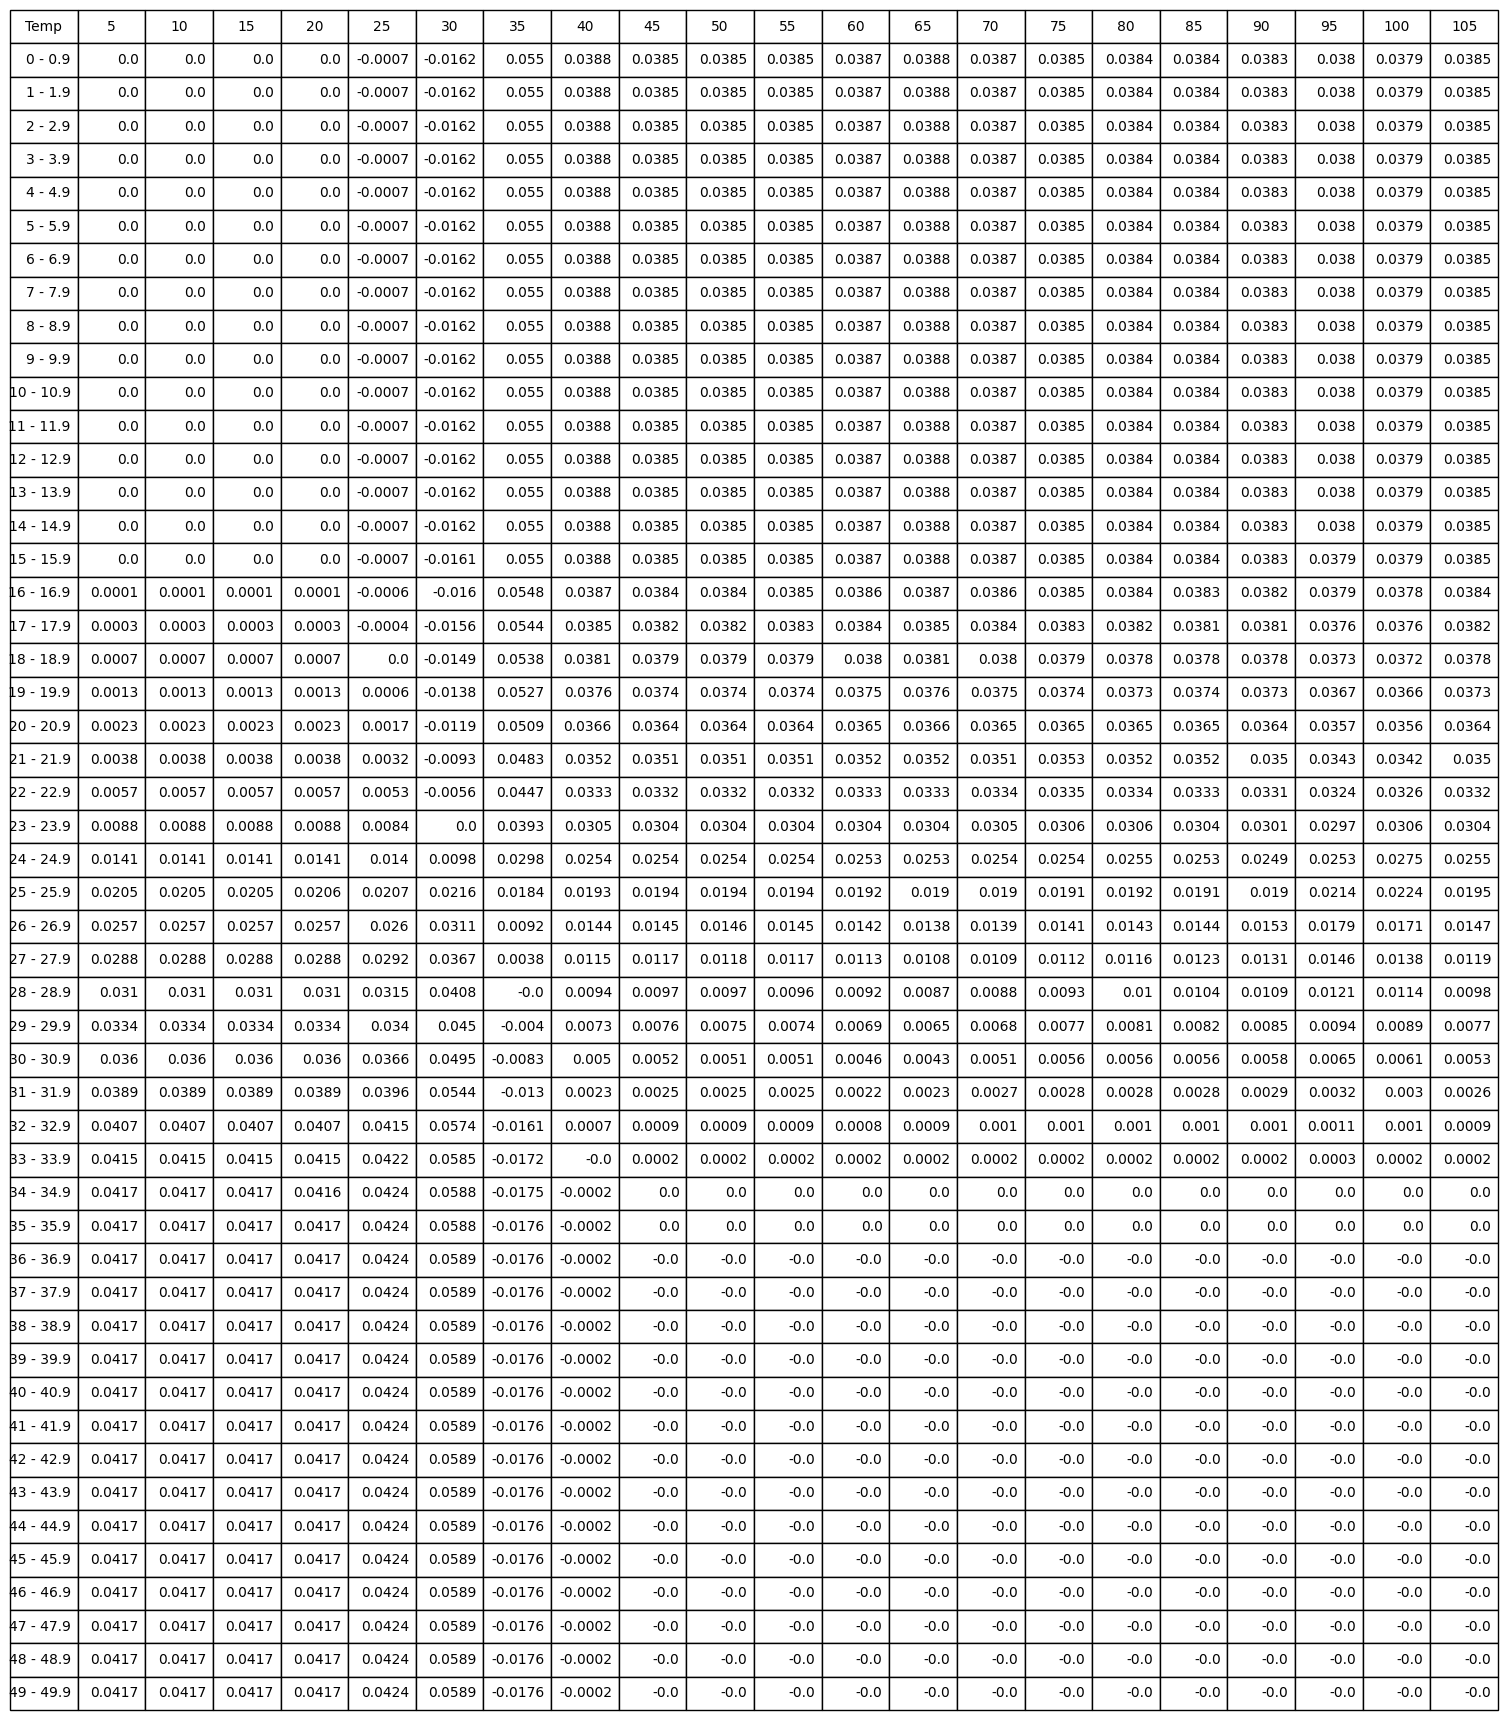

In [49]:
# For example, here's several helpful packages to load

# Get the temperature bin values for a month

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import numpy as np
import math
import matplotlib.pyplot as plt

year = 0
month_data = [
  {
    "month": "January",
    "temp": "/kaggle/input/ikeja-datasets/ikeja_datasets.csv",
    "rh": "/kaggle/input/ikeja-jan-r-h/ikeja_jan_rh.csv",
  },
]

def structure_record_in_df(df):
    all_time_records = []
    indexed_records = {}
    current_year = 0
    for index, row in df.iterrows():
        if not math.isnan(row.iloc[0]):
            current_year = int(row.iloc[0])
            temp_years_in_ds.extend([current_year])
        if not math.isnan(row.iloc[1]):
            temperatures = [float(val) for val in row[2:26]]  # Convert to floats
            indexed_records.setdefault(current_year, []).extend([temperatures])
            all_time_records.extend([temperatures])
    index_records_df = pd.DataFrame(indexed_records)
    # converts indexed records to pd             
    for year, temperatures in indexed_records.items():
        temp_df = pd.DataFrame(np.array(temperatures))
        dpd = pd.DataFrame(np.array(temperatures))
        indexed_records[year] = dpd
    return  indexed_records, all_time_records, index_records_df

def get_metadata_from_df(df):
    yearly_metadata = []
    for year, df in temp_daily_record_for_year.items():
        total_obs = df.count().sum()
        max_val = df.max().max()
        min_val = df.min().min()
        col = {"Year": year, "Total Observations": total_obs, "Minimum Value": min_val, "Maximum Value":max_val}
        yearly_metadata.append(col)
    return yearly_metadata

def get_temp_bin_keys():
    temp_bin_keys = []
    for i, val_range in enumerate(range(1,51)):
        temp_bin_keys.append(f"{i} - {i+0.9}")
    return temp_bin_keys


def get_rh_bin_keys():
    rh_bin_keys = {}
    for i, val_range in enumerate(range(0,101, 5)):
        k = f"{val_range + 5}"
        rh_bin_keys[f"{k}"] = []
    return rh_bin_keys

def cross_filter_df(main_df, adjacent_df, lowerbound, upperbound):
    range_filter = ((adjacent_df >= lowerbound) & (adjacent_df <= upperbound))
    return (main_df.where(range_filter == False, 0))

for rec in month_data:
    month = rec["month"]
    # Assuming the file is named 'data.csv'
    temp_file_path = rec["temp"]
    temp_df = pd.read_csv(temp_file_path)

    temp_daily_record_for_year, temp_cummulated_record_for_years, temp_cummulated_record_for_years_df = structure_record_in_df(temp_df)

    # store the total number of observations for each year
    temp_yearly_metadata_for_month = get_metadata_from_df(temp_daily_record_for_year)
        
    
    rh_file_path = rec["rh"]
    rh_df = pd.read_csv(rh_file_path)
    rh_daily_record_for_year, rh_cummulated_record_for_years, _ = structure_record_in_df(rh_df)
    
    temp_bin_keys = get_temp_bin_keys()
    
    rh_bin_keys = get_rh_bin_keys()
    
    merged_bin_keys = {}
    merged_bin_keys["Temp"] = temp_bin_keys


    default_temp_values = [None] * len(temp_bin_keys)
    rh_cummulated_record_for_years_df = pd.DataFrame(rh_cummulated_record_for_years)
    temp_cummulated_record_for_years_df = pd.DataFrame(temp_cummulated_record_for_years)
    for i, val_range in enumerate(range(0,101, 5)):
        # find anywhere that the pd is between val_range and val_range+0.9 in rh
        filtered_temp = cross_filter_df(temp_cummulated_record_for_years_df, rh_cummulated_record_for_years_df, val_range, val_range+4.9)
        
        low_high_difference = {}
        low_high_difference["diff_range"] = []
        for i, temp_val_range in enumerate(range(1,51)):
            low_df = filtered_temp.where(filtered_temp >= val_range, 0)
            low_df_sum = (low_df > 0).where((low_df > 0) == True).sum().sum()

            value_with_interval = temp_val_range + 0.9
            high_df = cummulated_record_for_years_df.where(filtered_temp > value_with_interval, 0)
            high_df_sum = (high_df > 0).where((high_df > 0) == True).sum().sum()
            diff = low_df_sum - high_df_sum
            low_high_difference["diff_range"].append(diff)

            prev_val = 0;
            if (i > 0):
                prev_val = low_high_difference["diff_range"][i]
                new_val = prev_val - diff

        total_obs_avg = pd.DataFrame(yearly_metadata_for_month)["Total Observations"].mean()
        low_high_difference_sum = pd.DataFrame(low_high_difference["diff_range"]).sum()[0]

        bin_values = []
        for value in low_high_difference["diff_range"]:
            calc_val = value / low_high_difference_sum * round(total_obs_avg)
            bin_values.append(round(calc_val / total_obs_avg, 4))

        k = f"{val_range+5}"
        merged_bin_keys[f"{k}"] =  bin_values


    merged_df = pd.DataFrame(merged_bin_keys)
    merged_df.set_index(['Temp'])

    fig, ax = plt.subplots()
    ax.axis('off')
    the_table = ax.table(colLabels=merged_df.columns, cellText=merged_df.values, loc='center')
    the_table.auto_set_font_size(False)
    the_table.set_fontsize(10)
    the_table.scale(3, 2)
    plt.show()